# CNN Multi-class

# Import Packages

In [1]:
# Base Packages
import os
import time
import random
import zipfile

# EDA packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

# Scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics as sklearn_metrics

# Tensorflow & Keras packages
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import plot_model

In [2]:
tf.__version__

'2.12.0'

# Load Data

## Download Data

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2023-07-08 04:17:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 142.251.10.128, 142.251.12.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  23.0MB/s    in 23s     

2023-07-08 04:18:13 (21.1 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



## Unzip Data

In [4]:
zip_ref = zipfile.ZipFile('./10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

## A walk with the data

In [5]:
for dirpath, dirnames, filenames in os.walk('./10_food_classes_all_data/'):
  print(f'Current Path {dirpath} ----- No. of directories {len(dirnames)} ----- No. of files {len(filenames)}')

Current Path ./10_food_classes_all_data/ ----- No. of directories 2 ----- No. of files 0
Current Path ./10_food_classes_all_data/train ----- No. of directories 10 ----- No. of files 0
Current Path ./10_food_classes_all_data/train/ramen ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/chicken_wings ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/pizza ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/grilled_salmon ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/steak ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/chicken_curry ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/ice_cream ----- No. of directories 0 ----- No. of files 750
Current Path ./10_food_classes_all_data/train/sushi ----- No. of director

There are 10 classes and it is a balanced dataset

In [6]:
food_classes = os.listdir('./10_food_classes_all_data/train')

# Viz Data

In [7]:
DATA_DIR = '10_food_classes_all_data'
TRAIN_DIR = f'{DATA_DIR}/train'
TEST_DIR = f'{DATA_DIR}/test'

In [8]:
def render_random_image(data_path, title):

    random_image = random.sample(os.listdir(data_path), 1)[0]
    random_image_path = mpimg.imread(data_path+random_image)
    plt.imshow(random_image_path)
    plt.title(title)
    plt.axis('off')
    return random_image_path

steak


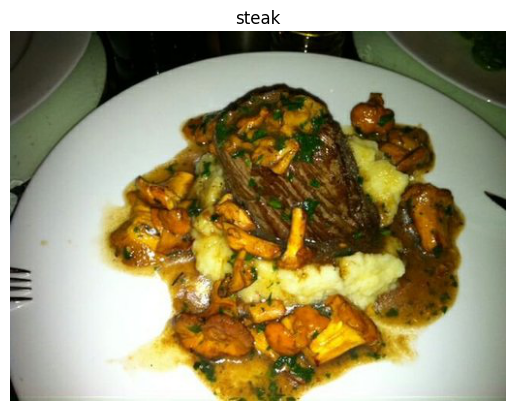

In [9]:
rand_choice = random.choice(food_classes)
render_random_image(f'{TRAIN_DIR}/{rand_choice}/', rand_choice)
print(rand_choice)

# Pre-process Data


In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load Data
train_data = train_datagen.flow_from_directory(TRAIN_DIR,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')

test_data = test_datagen.flow_from_directory(TEST_DIR,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# CNN Model

## Base Model

In [23]:
def build_cnn_model(layers, optimizer='adam',
                    loss=keras.losses.categorical_crossentropy, metrics=['accuracy']):

  model = keras.Sequential(layers)
  model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

  return model

In [24]:
base_model = build_cnn_model([
    keras.layers.Input((224, 224, 3)),

    keras.layers.Conv2D(10, 3, activation=keras.activations.relu),

    keras.layers.Conv2D(10, 3, activation=keras.activations.relu),
    keras.layers.MaxPool2D(2),

    keras.layers.Conv2D(10, 3, activation=keras.activations.relu),

    keras.layers.Conv2D(10, 3, activation=keras.activations.relu),
    keras.layers.MaxPool2D(2),

    keras.layers.Flatten(),

    keras.layers.Dense(10, activation=keras.activations.softmax)
])

In [25]:
history_1 = base_model.fit(train_data, epochs=5)

Epoch 1/5
235/235 [==============================] - 42s 170ms/step - loss: 2.1523 - accuracy: 0.2084
Epoch 2/5
235/235 [==============================] - 43s 183ms/step - loss: 1.8992 - accuracy: 0.3385
Epoch 3/5
235/235 [==============================] - 39s 167ms/step - loss: 1.5541 - accuracy: 0.4775
Epoch 4/5
235/235 [==============================] - 42s 176ms/step - loss: 0.9733 - accuracy: 0.6811
Epoch 5/5
235/235 [==============================] - 41s 176ms/step - loss: 0.4079 - accuracy: 0.8736


In [28]:
history_1.history

{'loss': [2.1522836685180664,
  1.8991751670837402,
  1.5540987253189087,
  0.9733203053474426,
  0.4078606069087982],
 'accuracy': [0.20839999616146088,
  0.33853334188461304,
  0.4774666726589203,
  0.6810666918754578,
  0.8736000061035156]}

<Axes: >

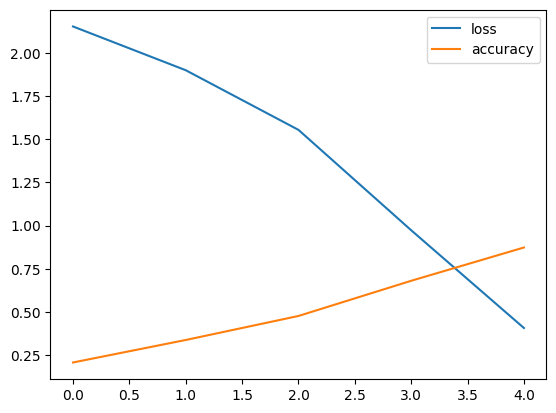

In [31]:
pd.DataFrame(history_1.history).plot()